<a id="Introduction"></a>
# Introduction

This week we will be focusing on NLP preprocessing and feature extraction techniques and codes. We will mainly use the [Real or Not? NLP with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started) dataset for illustration.

We will revise our concepts learned from last week and will be learning newer concepts based on feature extraction and word embeddings

<img src="https://miro.medium.com/max/1750/1*rJQVqDjbhI3k22lHqa4dFw.png" align="center"/>

image source: [Natural Language Processing Pipeline](https://towardsdatascience.com/natural-language-processing-pipeline-93df02ecd03f)

<a id="Read_and_explore_data"></a>

# Read and explore data

<a id="Importing_Main_Packages"></a>
## Importing Main Packages

In [1]:

import sys
import numpy as np
import pandas as pd
import sklearn

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk


<a id="Read_the_Data"></a>
## Read the Data

In [2]:
# read the "train.csv" file and display using head(). Name the variable as "train_df"

train_df = pd.read_csv("train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# some data exploration

display(train_df[~train_df["location"].isnull()].head())
display(train_df[train_df["target"] == 0]["text"].values[1])
display(train_df[train_df["target"] == 1]["text"].values[1])

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


'I love fruits'

'Forest fire near La Ronge Sask. Canada'

<a id="Text_Preprocessing"></a>

# Text Preprocessing:

<a id="Capitalization"></a>


In [4]:
#Write the code to remove all text capitalization and save it in a column called "text_clean"
# Complete the code below
# Hint: Use pandas apply()

train_df["text_clean"] = train_df["text"].apply(lambda x: x.lower())

train_df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


## Noise Removal 
Text data could include various unnecessary characters or punctuation such as URLs, HTML tags, non-ASCII characters, or other special characters (symbols, emojis, and other graphic characters). 

### Remove URLs

In [5]:
#complete the function below to remove urls

def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

# removing urls from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_URL(x))

# double check
print(train_df["text"][31])
print(train_df["text_clean"][31])
print(train_df["text"][37])
print(train_df["text_clean"][37])
print(train_df["text"][62])
print(train_df["text_clean"][62])

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
@bbcmtd wholesale markets ablaze 
INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA
inec office in abia set ablaze - 
Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z
rene ablaze &amp; jacinta - secret 2k13 (fallen skies edit) - mar 30 2013  


<a id="Remove_HTML_tags"></a>

### Remove HTML tags

In [6]:
#complete the function below to remove html tags


def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

# remove html from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_html(x))

# double check
print(train_df["text"][62])
print(train_df["text_clean"][62])
print(train_df["text"][7385])
print(train_df["text_clean"][7385])

Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z
rene ablaze  jacinta - secret 2k13 (fallen skies edit) - mar 30 2013  
NW Michigan #WindStorm (Sheer) Recovery Updates: Leelanau &amp; Grand Traverse - State of Emergency 2b extended http://t.co/OSKfyj8CK7 #BeSafe
nw michigan #windstorm (sheer) recovery updates: leelanau  grand traverse - state of emergency 2b extended  #besafe


<a id="Remove_Non_ASCII"></a>

### Remove Non-ASCI:

In [7]:
#complete the function below to remove non-ascii characters

def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 


# removing non-ascii characters from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_non_ascii(x))

# double check
print(train_df["text"][38])
print(train_df["text_clean"][38])
print(train_df["text"][7586])
print(train_df["text_clean"][7586])

Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J
barbados #bridgetown jamaica  two cars set ablaze: santa cruz  head of the st elizabeth police superintende...  
#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic intensity 0 Iwate Miyagi JST #?? http://t.co/gMoUl9zQ2Q
#sismo detectado #jap_n 15:41:07 seismic intensity 0 iwate miyagi jst #?? 


<a id="Remove_punctuations"></a>

## Remove punctuations:

In [8]:
#complete the function below to remove punctuations

def remove_punct(text):
    """
        Remove the punctuation
    """
    return text.translate(str.maketrans('', '', string.punctuation))

# removing punctuations from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_punct(x))

# double check
print(train_df["text"][5])
print(train_df["text_clean"][5])
print(train_df["text"][7597])
print(train_df["text_clean"][7597])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
rockyfire update  california hwy 20 closed in both directions due to lake county fire  cafire wildfires
#??? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/5B7qT2YxdA
    mh370 aircraft debris found on la reunion is from missing malaysia airlines  


<a id="Text_Preprocessing"></a>

# Text Preprocessing:

<a id="Tokenization"></a>
## Tokenization
Tokenization is a common technique that split a sentence into tokens, where a token could be characters, words, phrases, symbols, or other meaningful elements. By breaking sentences into smaller chunks, that would help to investigate the words in a sentence and also the subsequent steps in the NLP pipeline, such as stemming. 

[Back To Table of Contents](#top_section)

In [9]:
# Tokenizing the tweet base texts and save it in a column called "tokenized"
from nltk.tokenize import word_tokenize

#complete the code below to tokenize the text
train_df['tokenized'] = train_df['text_clean'].apply(word_tokenize)

train_df.head()

,id,keyword,location,text,target,text_clean,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


<a id="Remove_Stop_Words"></a>

## Remove Stop Words (or/and Frequent words/ Rare words):
Stop words are common words in any language that occur with a high frequency but do not deliver meaningful information for the whole sentence. For example, {“a”, “about”, “above”, “across”, “after”, “afterward”, “again”, ...} can be considered as stop words. Traditionally, we could remove all of them in the text preprocessing stage. However, refer to the example from the [Natural Language Processing in Action](https://www.manning.com/books/natural-language-processing-in-action) book: 
> * Mark reported to the CEO
> * Suzanne reported as the CEO to the board 

> In your NLP pipeline, you might create 4-grams such as reported to the CEO and reported as the CEO. If you remove the stop words from the 4-grams, both examples would be reduced to "reported CEO", and you would lack the information about the professional hierarchy. In the first example, Mark could have been an assistant to the CEO, whereas in the second example Suzanne was the CEO reporting to the board. Unfortunately, retaining the stop words within your pipeline creates another problem: it increases the length of the n-grams required to make use of these connections formed by the otherwise meaningless stop words. This issue forces us to retain at least 4-grams if you want to avoid the ambiguity of the human resources example.
> Designing a filter for stop words depends on your particular application.

In short, removing stop words is a common method in NLP text preprocessing, whereas, it needs to be experimented carefully depending on different situations. 


In [10]:
# Remove stopwords from train_df['tokenized'] and save it in another column called 'stopwords_removed'
# Hint: Use pandas apply function with lambda function (the way we did in previous cells) and you can use list
# comprehension to remove stop words

nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

#complete code below
train_df['stopwords_removed'] = train_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])


train_df.head()

[nltk_data] Downloading package stopwords to /home/rushil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


<a id="Stemming"></a>

## Stemming
Stemming is a process of extracting a root word - identifying a common stem among various forms (e.g., singular and plural noun form) of a word, for example, the words "gardening", "gardener" or "gardens" share the same stem, garden. Stemming uproots suffixes from words to merge words with similar meanings under their standard stem.

There are three major stemming algorithms in use nowadays:
- **Porter** - PorterStemmer()): This stemming algorithm is an older one. It’s from the 1980s and its main concern is removing the common endings to words so that they can be resolved to a common form. It’s not too complex and development on it is frozen. Typically, it’s a nice starting basic stemmer, but it’s not really advised to use it for any production/complex application. Instead, it has its place in research as a nice, basic stemming algorithm that can guarantee reproducibility. It also is a very gentle stemming algorithm when compared to others.

- **Snowball** -  SnowballStemmer(): This algorithm is also known as the Porter2 stemming algorithm. It is almost universally accepted as better than the Porter stemmer, even being acknowledged as such by the individual who created the Porter stemmer. That being said, it is also more aggressive than the Porter stemmer. A lot of the things added to the Snowball stemmer were because of issues noticed with the Porter stemmer. There is about a 5% difference in the way that Snowball stems versus Porter.

- **Lancaster** -LancasterStemmer(): Just for fun, the Lancaster stemming algorithm is another algorithm that you can use. This one is the most aggressive stemming algorithm of the bunch. However, if you use the stemmer in NLTK, you can add your own custom rules to this algorithm very easily. It’s a good choice for that. One complaint around this stemming algorithm though is that it sometimes is overly aggressive and can really transform words into strange stems. Just make sure it does what you want it to before you go with this option!

source: http://hunterheidenreich.com/blog/stemming-lemmatization-what/

### PorterStemmer

In [11]:
from nltk.stem import PorterStemmer

def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems


train_df['porter_stemmer'] = train_df['stopwords_removed'].apply(lambda x: porter_stemmer(x))

<a id="Lemmatization"></a>

## Lemmatization:
According to the [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf) book:
> Lemmatization is the task of determining that two words have the same root, despite their surface differences. The words am, are, and is have the shared lemma be; the words dinner and dinners both have the lemma dinner. Lemmatizing each of these forms to the same lemma will let us ﬁnd all mentions of words in Russian like Moscow. The lemmatized form of a sentence like He is reading detective stories would thus be He be read detective story.

and the book [Natural Language Processing in Action](https://www.manning.com/books/natural-language-processing-in-action):
> Some lemmatizers use the word’s part of speech (POS) tag in addition to its spelling to help improve accuracy. The POS tag for a word indicates its role in the grammar of a phrase or sentence. For example, the noun POS is for words that refer to “people, places, or things” within a phrase. An adjective POS is for a word that modifies or describes a noun. A verb refers to an action. The POS of a word in isolation cannot be determined. The context of a word must be known for its POS to be identified. So some advanced lemmatizers can’t be run-on words in isolation.

For example, the "good", "better" or "best" is lemmatized into good and the verb "gardening" should be lemmatized to "to garden", while the "garden" and "gardener" are both different lemmas. In this notebook, we will also explore on both lemmatize on without POS-Tagging and POS-Tagging examples.


<a id="Lemmatization"></a>

### Lemmatization:


In [12]:
from nltk.stem import WordNetLemmatizer

#Apply lemmatization on train_df['stopwords_removed'] and save it in train_df['lemmatize_word']
lemmatizer = WordNetLemmatizer()

train_df['lemmatize_word'] = train_df['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#Now, remove any newly formed stop words in train_df['lemmatize_word']
train_df['lemmatize_word'] = train_df['lemmatize_word'].apply(lambda x: [word for word in x if word not in stop])



#Joining the lemmatized tokens back to text
train_df['lemmatize_text'] = [' '.join(map(str, l)) for l in train_df['lemmatize_word']] 

train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,porter_stemmer,lemmatize_word,lemmatize_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [13]:
#comparison between original text and lemmatized text

print(train_df["text"][8])
print(train_df["lemmatize_word"][8])


There's an emergency evacuation happening now in the building across the street
['emergency', 'evacuation', 'happening', 'building', 'across', 'street']


Comparison between original text and the lammatized text:

In [14]:
display(train_df["text"][0], train_df["lemmatize_text"][0])
display(train_df["text"][5], train_df["lemmatize_text"][5])
display(train_df["text"][10], train_df["lemmatize_text"][10])
display(train_df["text"][15], train_df["lemmatize_text"][15])
display(train_df["text"][20], train_df["lemmatize_text"][20])

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

'deed reason earthquake may allah forgive u'

'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

'rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire'

'Three people died from the heat wave so far'

'three people died heat wave far'

"What's up man?"

'whats man'

'this is ridiculous....'

'ridiculous'

# Text Features Extraction:

## Weighted Words - Bag of Words (BoW) - Bag of n-grams:
**Watch this video: https://www.youtube.com/watch?v=IKgBLTeQQL8**

* N-gram is a sequence that contains n-elements (characters, words, etc). A single word such a "apple", "orange" is a Uni-gram; hence, "red apple" "big orange" is bi-gram and "red ripped apple", "big orange bag" is tri-gram. 
* Bags of words: Vectors of word counts or frequencies 
* Bags of n-grams: Counts of word pairs (bigrams), triplets (trigrams), and so on

> The bag-of-words/ bag-of-n-gram model is a reduced and simpliﬁed representation of a text document from selected parts of the text, based on speciﬁc criteria, such as word frequency.
> 
> In a BoW, a body of text, such as a document or a sentence, is thought of like a bag of words. Lists of words are created in the BoW process. These words in a matrix are not sentences which structure sentences and grammar, and the semantic relationship between these words are ignored in their collection and construction. The words are often representative of the content of a sentence. While grammar and order of appearance are ignored, multiplicity is counted and may be used later to determine the focus points of the documents.
> 
> Example:
> Document
> 
> “As the home to UVA’s recognized undergraduate and graduate degree programs in systems engineering. In the UVA Department of Systems and Information Engineering, our students are exposed to a wide range of range”
> 
> Bag-of-Words (BoW):
> {“As”, “the”, “home”, “to”, “UVA’s”, “recognized”, “undergraduate”, “and”, “graduate”, “degree”, “program”, “in”, “systems”, “engineering”, “in”, “Department”, “Information”,“students”, “ ”,“are”, “exposed”, “wide”, “range” }
> 
> Bag-of-Feature (BoF)
> Feature = {1,1,1,3,2,1,2,1,2,3,1,1,1,2,1,1,1,1,1,1}

### Frequency Vectors - CountVectorizer:
We will implement the Bag of Words/ Bag of n-grams text representation via sklearn - CountVectorizer function.
The code will test with a sample corpus of the first five sentence of the dataset, then print out the output of uni-gram, bi-gram and tri-gram. Finaly, we also run on the whole dataset.



In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# implement CountVectorizer for 1-gram, 2-gram and 3-gram on train_df["lemmatize_text"].tolist()

def cv(data, ngram = 1, MAX_NB_WORDS = 75000):
    """
        return transformed_dataset, CountVectorizer_object
    """
    #create count_vectorizer object having parameters: ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    
    #calling the fit.transform() function, save the document term matrix in emb in an array format 
    emb = count_vectorizer.fit_transform(data).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer

# implement 1-gram, 2-gram and 3-gram into the whole dataset

train_df_corpus = train_df["lemmatize_text"].tolist()
train_df_em_1gram, cv_1gram = cv(train_df_corpus, ngram=1)
train_df_em_2gram, cv_2gram = cv(train_df_corpus, ngram=2)
train_df_em_3gram, cv_3gram = cv(train_df_corpus, ngram=3)

print(len(train_df_corpus))
print(train_df_em_1gram.shape)
print(train_df_em_2gram.shape)
print(train_df_em_3gram.shape)

count vectorize with 16261 features
count vectorize with 46841 features
count vectorize with 44731 features
7613
(7613, 16261)
(7613, 46841)
(7613, 44731)


<a id="TF_IDF"></a>

### Term Frequency-Inverse Document Frequency (TF-IDF):
**Watch this video: https://www.youtube.com/watch?v=D2V1okCEsiE**
> The Inverse Document Frequency (IDF) as a method to be used in conjunction with term frequency in order to lessen the effect of implicitly common words in the corpus. IDF assigns a higher weight to words with either high or low frequencies term in the document. This combination of TF and IDF is well known as Term Frequency-Inverse document frequency (TF-IDF). The mathematical representation of the weight of a term in a document by TF-IDF is given in Equation: 
> $$ W(d,t) = TF(d,t) * log \frac{N}{df(t)}$$
> Here N is the number of documents and $df(t)$ is the number of documents containing the term t in the corpus. The ﬁrst term in the equation improves the recall while the second term improves the precision of the word embedding. Although TF-IDF tries to overcome the problem of common terms in the document, it still suffers from some other descriptive limitations. Namely, TF-IDF cannot account for the similarity between the words in the document since each word is independently presented as an index. However, with the development of more complex models in recent years, new methods, such as word embedding, have been presented that can incorporate concepts such as similarity of words and part of speech tagging.

(source: [Text Classification Algorithms: A Survey](https://arxiv.org/abs/1904.08067))

We also implement the TF-IDF via sklearn TfidfVectorizer function, the experiments are similar to the previous [Frequency Vectors - CountVectorizer](#CountVectorizer) section

[Back To Table of Contents](#top_section)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

#implement tfid vectorizer for ngram=1, on train_df["lemmatize_text"].tolist() and print its shape
def TFIDF(data, ngram = 1, MAX_NB_WORDS = 75000):
    """
        return transformed_dataset, TfidfVectorizer_object
    """
    tfidf_x = TfidfVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = tfidf_x.fit_transform(data).toarray()
    print("tf-idf with", str(np.array(emb).shape[1]), "features")
    return emb, tfidf_x


train_df_corpus = train_df["lemmatize_text"].tolist()
train_df_tfidf_1gram, tfidf_1gram = TFIDF(train_df_corpus, 1)

print(len(train_df_corpus))
print(train_df_tfidf_1gram.shape)

tf-idf with 16261 features
7613
(7613, 16261)


<a id="Word_Embedding"></a>

## Word Embedding:

> **Word vectors** are numerical vector representations of word semantics, or meaning, including literal and implied meaning. So word vectors can capture the connotation of words, like “peopleness,” “animalness,” “placeness,” “thingness,” and even “conceptness.” And they combine all that into a dense vector (no zeros) of floating point values. This dense vector enables queries and logical reasoning.

(source: [Natural Language Processing in Action](https://www.manning.com/books/natural-language-processing-in-action))

> Even though we have syntactic word representations, it does not mean that the model captures the semantics meaning of the words. On the other hand, bag-of-word models do not respect the semantics of the word. For example, words “airplane”, “aeroplane”, “plane”, and “aircraft” are often used in the same context. However, the vectors corresponding to these words are orthogonal in the bag-of-words model. This issue presents a serious problem to understanding sentences within the model. The other problem in the bag-of-word is that the order of words in the phrase is not respected. The n-gram does not solve this problem so a similarity needs to be found for each word in the sentence. Many researchers worked on word embedding to solve this problem. The Word2Vec propose a simple single-layer architecture based on the inner product between two word vectors.

> Word embedding is a feature learning technique in which each word or phrase from the vocabulary is mapped to a N dimension vector of real numbers. Various word embedding methods have been proposed to translate unigrams into understandable input for machine learning algorithms. This work focuses on Word2Vec, GloVe, and FastText, three of the most common methods that have been successfully used for deep learning techniques.

(source: [Text Classification Algorithms: A Survey](https://arxiv.org/abs/1904.08067))

<a id="Basic_Word_Embedding"></a>
### Basic Word Embedding Methods:

**Watch this video: https://www.youtube.com/watch?v=pO_6Jk0QtKw
#### Word2Vec:

[T. Mikolov et al.](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) presented the Word2vec in 2013, which learns the meaning of words merely by processing a large corpus of unlabeled text. The Word2Vec approach uses shallow neural networks with two hidden layers, continuous bag-of-words (CBOW), and the Skip-gram model to create a high dimension vector for each word. This unsupervised nature of Word2vec is what makes it so powerful. The world is full of unlabeled, uncategorized, unstructured natural language text.

We will implement the Word2vec via gensim libary 


In [17]:
import gensim

# train the model on train_df["lemmatize_word"].tolist()
model = gensim.models.Word2Vec(train_df["lemmatize_word"].tolist(), min_count=100, window=5, size=100) 

# print summary of the model
print(model)

# print vector for any one word
print(model.wv['man'])

Word2Vec(vocab=57, size=100, alpha=0.025)
[-0.00424375 -0.00169021  0.00146662 -0.00168065 -0.00528509 -0.00414068
  0.00155782 -0.00486398 -0.00318528 -0.00107962 -0.0043138   0.00123467
 -0.00237407 -0.00246045 -0.00419949  0.0013618  -0.00080879  0.00022059
 -0.00211925 -0.0013195   0.00222763  0.00267631 -0.00400624  0.00078806
 -0.00250426  0.00286471  0.00432882 -0.00370886  0.00614922 -0.0039841
 -0.00171008 -0.00188105  0.00436239  0.00312123 -0.00313914 -0.00294891
  0.00098897  0.00105723 -0.00500181 -0.00218944 -0.00212017 -0.00377124
  0.0018658  -0.00158671  0.00335775 -0.00147351 -0.00495262 -0.00193236
  0.00071798  0.00515028  0.00397838 -0.00412701 -0.00199844  0.00580087
  0.00071004 -0.00206984  0.00396113  0.0016253   0.00048927 -0.0044109
 -0.00257883 -0.00031488 -0.00630596  0.00356859 -0.00214601  0.00165081
 -0.00032206  0.0027581  -0.00471659 -0.00450809 -0.00130293  0.00143003
 -0.004992    0.00017308 -0.00297288  0.00391728  0.00011232 -0.00106636
  0.0001355

In [18]:
#print the similarities between any two words in the dataset
print(model.wv.similarity('war', 'death'))

0.19929264


<a id="GloVe"></a>

#### Global Vectors for Word Representation (GloVe):
> Another powerful word embedding technique that has been used for text classiﬁcation is [Global Vectors (GloVe)](https://nlp.stanford.edu/pubs/glove.pdf). The approach is very similar to the Word2Vec method, where each word is presented by a high dimension vector and trained based on the surrounding words over a huge corpus. The pre-trained word embedding used in many works is based on 400,000 vocabularies trained over Wikipedia 2014 and Gigaword 5 as the corpus and 50 dimensions for word presentation. GloVe also provides other pre-trained word vectorizations with 100, 200, 300 dimensions which are trained over even bigger corpora, including Twitter content.

We will create our GloVe's sentence embeddings  via gensim libary with the pre-trained word vectors on the dataset from Wikipedia 2014 + Gigaword 5 (source: https://github.com/stanfordnlp/GloVe) and see the embedding output on the sample sentence from the our dataset. 




In [19]:

from gensim.scripts.glove2word2vec import glove2word2vec
import gensim
#download glove embeddings from: https://www.kaggle.com/anindya2906/glove6b and save it in the same folder as this task

glove_input_file = "glove.6B.100d.txt" #if you have named the file differently, then make changes here
word2vec_output_file = "glove.6B.100d.txt.word2vec"
glove2word2vec(glove_input_file, word2vec_output_file) #converting glove_input_file in word format to word2vec format

glove_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False, limit=200000) 

Compare the similarity between "cat" vs. "kitten" and "cat" vs. "cats" from GloVe

In [20]:
# Compare the similarity between "cat" vs. "kitten" and "cat" vs. "cats" from the GloVe Model
print(glove_model.similarity('cat', 'kitten'))
print(glove_model.similarity('cat', 'cats'))

0.5580502
0.7323004


## T-SNE

**Watch This Video: https://www.youtube.com/watch?v=NEaUSP4YerM**<br>
Now, lets visualize some of our embeddings. To plot embeddings with a dimensionality of 100 or more, we first need to map them to a dimensionality of 2. We do this with the popular t-SNE method. T-SNE, short for t-distributed Stochastic Neighbor Embedding, helps us visualize high-dimensional data by mapping similar data to nearby points and dissimilar data to distance points in the low-dimensional space.

T-SNE is present in Scikit-learn. To run it, we just have to specify the number of dimensions we'd like to map the data to (n_components), and the similarity metric that t-SNE should use to compute the similarity between two data points (metric). We're going to map to 2 dimensions and use the cosine as our similarity metric. Additionally, we use PCA as an initialization method to remove some noise and speed up computation. The Scikit-learn user guide contains some additional tips for optimizing performance.

Plotting all the embeddings in our vector space would result in a very crowded figure where the labels are hardly legible. Therefore we'll focus on a subset of embeddings by selecting the 200 most similar words to a target word.



In [21]:
#tSNE
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

target_word = "body"
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=200)] + [target_word]
embeddings = [model.wv[w] for w in selected_words] + model.wv["body"]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/home/rushil/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


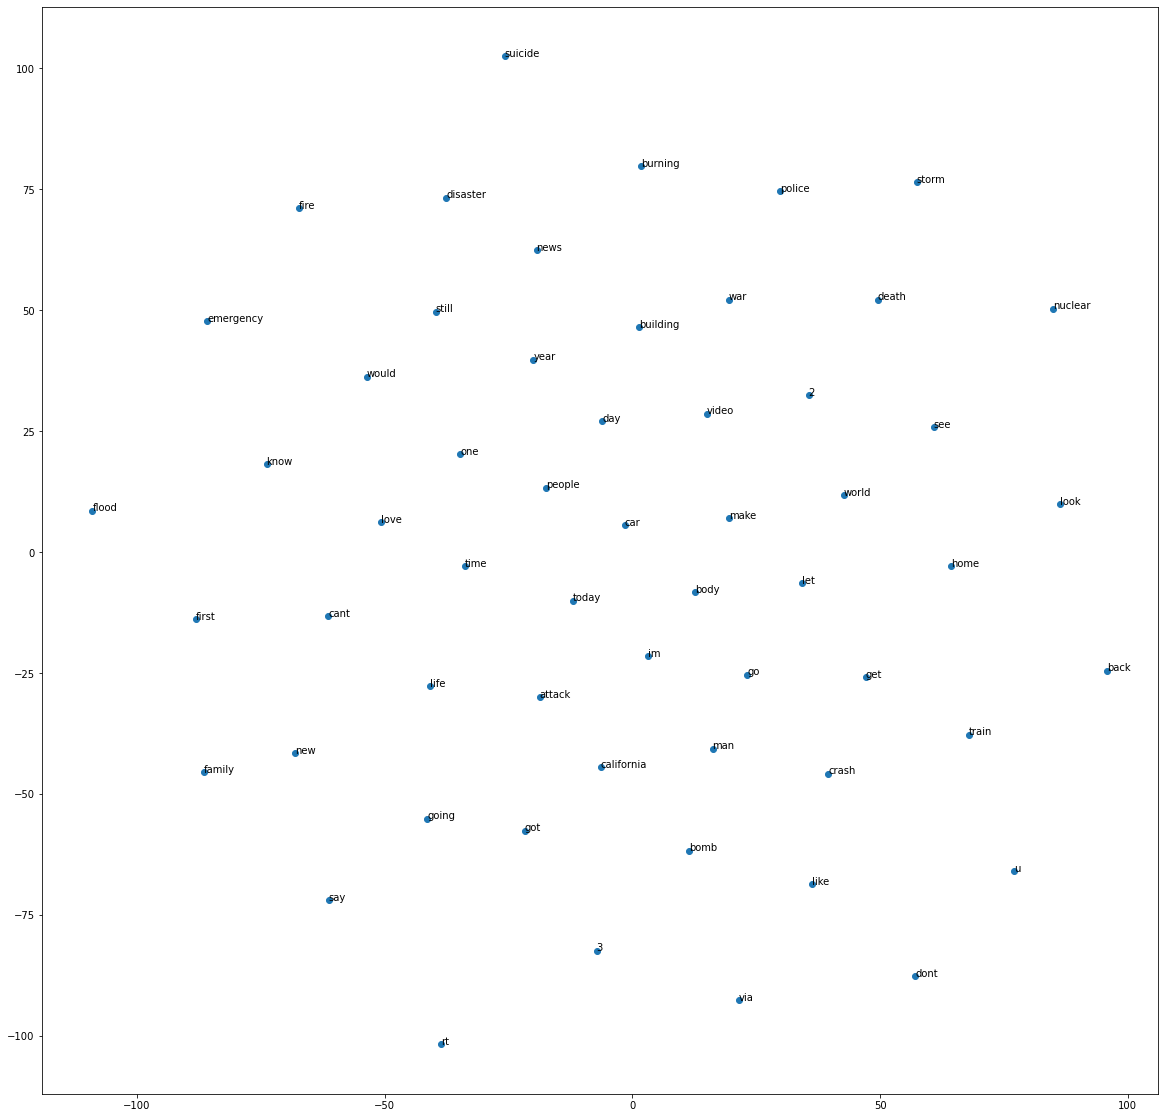

In [22]:
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))